In [1]:
from analysis.utils import module_reload
module_reload('analysis')
from analysis.import_data import import_true_reco
from analysis.calc import get_kinematics
from analysis.plot_matplotlib import plot_hist, export_figures
import seaborn as sns
import numpy as np

/nfs/dust/ilc/user/bliewert/miniconda3/envs/py311/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Select events for VEGAS integration

In [2]:
df = import_true_reco()
zhh = df[df['is_zhh'] == 1]
zzh = df[df['is_zzh'] == 1]

Current length: 99238: 100%|██████████| 63/63 [00:11<00:00,  5.68it/s]


Saved cache file to /nfs/dust/ilc/user/bliewert/fullflow_v3/comparison/cache/comparison_reco_zhh_zzh.npy


<Axes: xlabel='error_code', ylabel='count'>

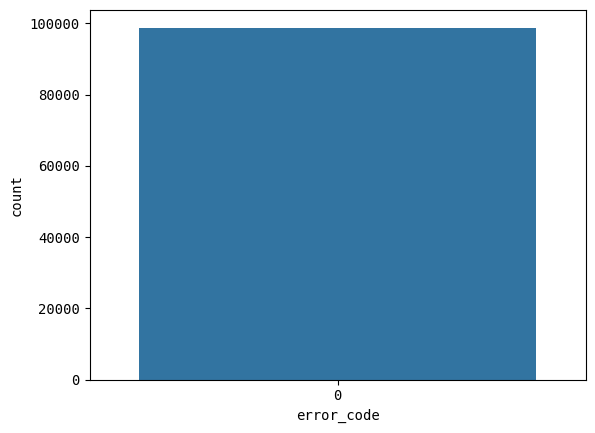

In [3]:
sns.countplot(df, x='error_code')

nZHH * ( 1 + ZZH/ZHH) = nTOT

In [4]:
from analysis.mem_ana import constants
from analysis.mem_ana import load_results

nTOT = 4096
bkg_to_sig = (constants['sigma_zzh']*constants['B_Z_bb'])/(constants['sigma_zhh']*constants['B_H_bb'])

print('bkg_to_sig', bkg_to_sig)

nZHH = int(nTOT / (1 + bkg_to_sig))
nZZH = nTOT - nZHH
print(f'Total of {nTOT} events with {nZHH} ZHH and {nZZH} ZZH')

bkg_to_sig 1.9582742822429062
Total of 4096 events with 1384 ZHH and 2712 ZZH


In [5]:
zhh_indices = df[df['is_zhh'] == True].index
zzh_indices = df[df['is_zzh'] == True].index

In [6]:
np.random.seed(42)
selected_zhh = np.random.choice(zhh_indices, nZHH, replace=False)
selected_zzh = np.random.choice(zzh_indices, nZZH, replace=False)

assert(not 0 in np.unique(df.iloc[selected_zhh]['is_zhh'], return_counts=True)[0])
assert(not 0 in np.unique(df.iloc[selected_zzh]['is_zzh'], return_counts=True)[0])

for i in selected_zhh: print(i)
for i in selected_zzh: print(i)

33709
56314
74164
81082
57046
76779
24666
60105
23757
77284
50739
39139
72773
64643
33049
19009
34383
37988
77638
84221
19263
25246
34640
25612
62977
31773
54356
59157
36917
57800
31652
54453
52544
41644
79854
79467
61299
16249
76330
28518
68682
82096
56150
39894
19780
82647
81141
47973
33932
72553
79669
84341
38927
21229
61536
68545
71186
55499
28164
26835
49659
15119
20968
44717
84107
82567
56446
64394
53293
16194
35009
35996
66455
71328
16819
77442
66101
83555
60947
22721
44603
14635
56165
45936
66142
39754
76485
81260
50064
72684
74309
51951
64143
53200
50166
82912
77701
63598
29900
76552
56151
55375
39745
33369
45027
40277
83910
76335
30467
43219
48351
46956
20852
48039
73649
21107
82652
75431
77892
84422
67429
79911
24700
82020
35527
61857
52181
37567
33321
60962
29720
31843
72917
54728
82632
35115
15080
25586
77645
74785
33771
47187
46254
43922
38922
73516
70400
54596
59155
27760
53442
15352
17112
30969
53672
41497
36863
37067
38717
40119
23570
19742
43877
83969
65395
48109
3391

Results for VEGAS

In [27]:
module_reload('analysis')
from analysis.mem_ana import load_results, get_result

results = load_results('/nfs/dust/ilc/user/bliewert/mem_integrate/results_wrong_balance', reco=df)

sig 4066 bkg 250.2203110377262


In [10]:
df[df['event'] == 7336]

,run,event,error_code,is_zhh,is_zzh,passed_preselection,true_h1_decay_pdg,true_h2_decay_pdg,true_z2_decay_pdg,misclustering_region,...,zzh_mzzh,zzh_mh,zzh_phi,zzh_phiz,zzh_phiz1f,zzh_phiz2f,zzh_costheta,zzh_costhetaz,zzh_costhetaz1f,zzh_costhetaz2f
16159,403001,7336,0,1,0,1,5,5,0,0,...,502.487244,126.311089,2.805492,0.473305,0.963528,0.812207,0.404936,-0.577895,-0.585455,0.068774


Debug

In [51]:
module_reload('analysis')

from analysis.plot_matplotlib import plot_confusion, plot_roc
from analysis.mem_ana import plot_r, best_threshold, conf_mat
from analysis.mem_ana import load_results, get_result

results = load_results('/nfs/dust/ilc/user/bliewert/mem_integrate/results', reco=df, normalize_samples=True,
                       variance_weighted=False, perms_all=False, use_npy=True,)

AssertionError: 

<Axes: xlabel='Predicted label', ylabel='Actual label'>

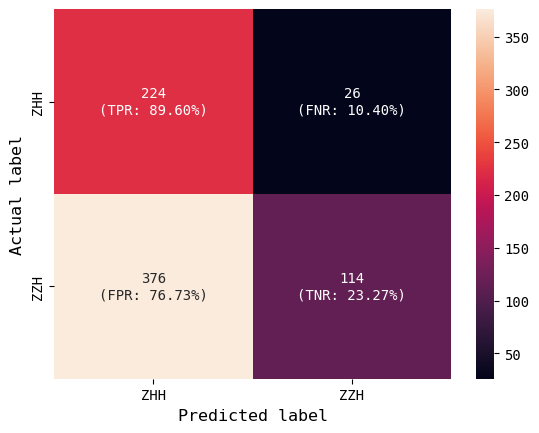

In [ ]:
best_t, t_df = best_threshold(results, optimization_scheme=3, return_df=True, nsteps=1000)
confusion = conf_mat(results, threshold=best_t)
plot_confusion(confusion)

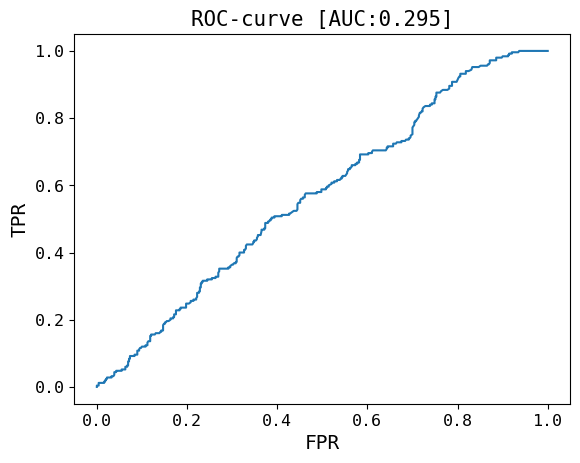

In [42]:
plot_roc(t_df);

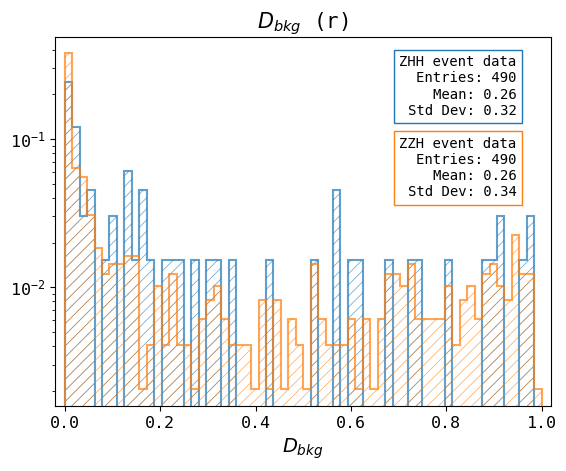

In [14]:
plot_r(results, name='r')

In [70]:
from os import listdir
events = np.array([int(name.replace("event_", "")) for name in listdir('/nfs/dust/ilc/user/bliewert/mem_integrate/results')])

print(np.unique(np.in1d(np.concatenate([selected_zhh, selected_zzh]), results), return_counts=True))

(array([ True]), array([4096]))


In [72]:
df.iloc[events]['is_zhh']

65271    1
30564    1
35550    1
25922    1
25252    1
        ..
68800    1
17231    1
28014    1
18530    1
77442    1
Name: is_zhh, Length: 4066, dtype: int32

In [65]:
np.unique(df.iloc[events]['is_zhh'], return_counts=True)

(array([1], dtype=int32), array([4066]))

In [55]:
np.unique(df[df['event'].isin(results['event'])]['is_zhh'], return_counts=True)

(array([0, 1], dtype=int32), array([ 721, 1203]))

In [56]:
len(results)

4066

In [45]:
sns.countplot(results, x='is_zzh')

ValueError: min() arg is an empty sequence

In [22]:
np.unique(df[df['event'].isin(results['event'])]['is_zhh'], return_counts=True)

(array([0, 1], dtype=int32), array([ 40, 101]))

In [23]:
results['event']

672        672
12232    12232
11321    11321
3825      3825
13588    13588
         ...  
11256    11256
15841    15841
22887    22887
4463      4463
4640      4640
Name: event, Length: 333, dtype: int64

In [ ]:
base_dir = '/'